In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="HqlrANePJjGwviySzJCz")
project = rf.workspace("asdf").project("boggle-cubes-8wl9u")
dataset = project.version(1).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to boggle-cubes-1 in yolov7pytorch:: 100%|██████████| 588/588 [00:00<00:00, 5624.89it/s]


In [2]:
!python3 train.py --batch 16  --cfg cfg/training/yolov7.yaml --epochs 55 --data boggle-cubes-1/data.yaml --weights 'yolov7.pt' --device 0

YOLOR 🚀 v0.1-84-gb8956dd torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='boggle-cubes-1/data.yaml', device='0', entity=None, epochs=55, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, 

In [4]:
!python detect.py --weights runs/train/exp2/weights/best.pt --conf 0.1 --source boggle-cubes-1/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='boggle-cubes-1/test/images', update=False, view_img=False, weights=['runs/train/exp2/weights/best.pt'])
YOLOR 🚀 v0.1-84-gb8956dd torch 1.11.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/ubuntu/yolov7/.env/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36643592 parameters, 6194944 gradients, 103.7 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 mo

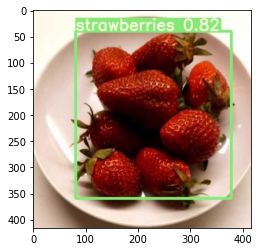

In [34]:
import glob
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2
i = 0
limit = 100 # max images to print
for imageName in glob.glob('runs/detect/exp2/*.jpg'): #assuming JPG
    if i < limit:
      im = cv2.imread(imageName)
      plt.imshow(im[:,:, ::-1])

    i = i + 1